In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import theano
import pickle

import os, sys, inspect
cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0]))
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder + '/carl')

matplotlib.style.use('ggplot')

np.random.seed(1234)

import astropy.stats as astropy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
X0 = pickle.load(open('tmp_X0.dat','r'))
X1 = pickle.load(open('tmp_X1.dat','r'))

In [71]:
X0.shape

(5000, 1)

In [134]:
bins = 30
eps = 0.1
t_min = max(0, min(np.min(X0), np.min(X1)) - eps)
t_max = min(1, max(np.max(X0), np.max(X1)) + eps)
range = [(t_min, t_max)]
reals2 = np.linspace(0, 1)
normed = False

In [135]:
def overflowbins(h,e):
    h = np.insert(h, 0, 0., axis=0)
    h = np.insert(h, h.shape[0], 0., axis=0)
    e[0] = np.insert(e[0], 0, -np.inf)
    e[0] = np.insert(e[0], len(e[0]), np.inf)
    return h,e

def pdf(X,h,e):
    all_indices = []
    indices = np.searchsorted(e[0],
                              X[:, 0],
                              side="right") - 1

    # For the last bin, the upper is inclusive
    indices[X[:, 0] == e[0][-2]] -= 1
    all_indices.append(indices)

    return h[all_indices]

In [136]:
h0, e0 = np.histogramdd(X0, bins=bins, range=range,normed=normed) 
h1, e1 = np.histogramdd(X1, bins=bins, range=range,normed=normed) 
h0,e0 = overflowbins(h0,e0)
h1,e1 = overflowbins(h1,e1)
# Under-overflow bins

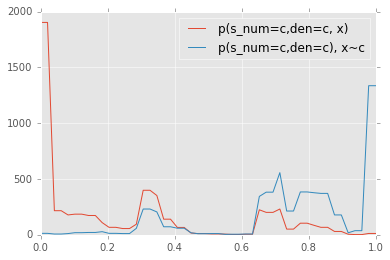

In [137]:
plt.plot(reals2, pdf(reals2.reshape(-1, 1),h0,e0), 
         label="p(s_num=c,den=c, x)")
plt.plot(reals2, pdf(reals2.reshape(-1, 1),h1,e1), 
        label="p(s_num=c,den=c), x~c")
plt.legend()
plt.show()

In [138]:
bins = astropy.bayesian_blocks(X0.ravel(), fitness='events',p0=0.1)
#da, bins = astropy.scott_bin_width(X.ravel(), True)
h0_b, e0_b = np.histogram(X0.ravel(), bins=bins, range=range[0],normed=normed)

e0_b = [e0_b]
bins = astropy.bayesian_blocks(X1.ravel(), fitness='events',p0=0.1)
#da, bins = astropy.scott_bin_width(X.ravel(), True)
h1_b, e1_b = np.histogram(X1.ravel(), bins=bins, range=range[0],normed=normed)
e1_b = [e1_b]

h0_b,e0_b = overflowbins(h0_b,e0_b)
h1_b,e1_b = overflowbins(h1_b,e1_b)

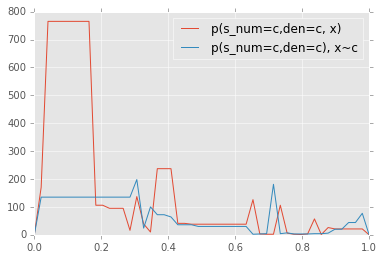

In [139]:
plt.plot(reals2, pdf(reals2.reshape(-1, 1),h0_b,e0_b), 
         label="p(s_num=c,den=c, x)")
plt.plot(reals2, pdf(reals2.reshape(-1, 1),h1_b,e1_b), 
        label="p(s_num=c,den=c), x~c")
plt.legend()
plt.show()

In [140]:
print(h1)
print(e1)

[    0.    13.     7.    11.    19.    21.    28.    13.    11.    58.
   231.   205.    72.    59.    18.    10.    11.     4.     5.     7.
   344.   382.   557.   213.   384.   377.   371.   178.    18.    37.
  1336.     0.]
[array([       -inf,  0.        ,  0.03333334,  0.06666667,  0.1       ,
        0.13333334,  0.16666667,  0.2       ,  0.23333333,  0.26666668,
        0.30000001,  0.33333334,  0.36666667,  0.40000001,  0.43333334,
        0.46666667,  0.5       ,  0.53333336,  0.56666666,  0.60000002,
        0.63333333,  0.66666669,  0.69999999,  0.73333335,  0.76666665,
        0.80000001,  0.83333331,  0.86666667,  0.89999998,  0.93333334,
        0.96666664,  1.        ,         inf], dtype=float32)]


In [126]:
print(h1_b)
print(e1_b)

[  0 135 198  39  24  15  30  15 100   9  22  14  72  64  36  30 164   2
 177   3 377   4 180   2 181   3 190   4 202   7 189   3 191   3 187   3
 182   4 187   4 179   6 168  20  44  77   4  21  33  10  19  21  30   3
  24  20  19   3  33  25  10  28  35  20  38  30  53  35  25  41  27  45
  21 354   7  29  13  20   8  32   9  28   6  41   3   4  27   0]
[array([       -inf,  0.00785203,  0.29508908,  0.31422985,  0.32107955,
        0.33244635,  0.3328692 ,  0.3369858 ,  0.33727139,  0.35219112,
        0.35232759,  0.35711752,  0.35782966,  0.3963197 ,  0.41522424,
        0.48187606,  0.64096001,  0.64963937,  0.65738437,  0.66328588,
        0.67505306,  0.69089168,  0.70241243,  0.70397696,  0.71180746,
        0.72205082,  0.73120126,  0.73330581,  0.74705151,  0.74961725,
        0.76497808,  0.76781937,  0.78317907,  0.79126492,  0.80215698,
        0.80658713,  0.82204837,  0.82331419,  0.84029922,  0.84319696,
        0.8592273 ,  0.86602092,  0.87991497,  0.88184765,  0.931

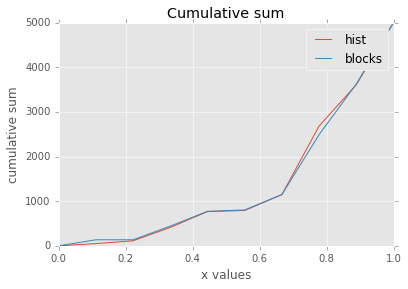

In [127]:
x = np.linspace(0.,1.,10)
cum1 = [h1[:np.argmin(e1[0] < k)].sum() for k in x]
cum1_b = [h1_b[:np.argmin(e1_b[0] < k)].sum() for k in x]
plt.plot(x,cum1,label='hist')
plt.plot(x,cum1_b,label='blocks')
plt.legend()
plt.title('Cumulative sum')
plt.ylabel('cumulative sum')
plt.xlabel('x values')

In [92]:
h1_b[np.argmin(e1_b[0] < 0.8):].sum()

2315